<a href="https://colab.research.google.com/github/Solostriker/SunkalpChandra_HTHS-1-10-24_Research/blob/main/control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sn



Epoch 1/100


<ipython-input-9-a6ab3685a968>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Cq Mean', 'Cq Std. Dev']] = scaler.fit_transform(X[['Cq Mean', 'Cq Std. Dev']].copy())


2/2 [==============================] - 1s 246ms/step - loss: 0.7074 - accuracy: 0.5375 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6981 - accuracy: 0.5625 - val_loss: 0.7016 - val_accuracy: 0.4500
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6914 - accuracy: 0.5750 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6868 - accuracy: 0.5625 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6823 - accuracy: 0.5250 - val_loss: 0.6901 - val_accuracy: 0.5500
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6778 - accuracy: 0.5625 - val_loss: 0.6882 - val_accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6741 - accuracy: 0.5875 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==============

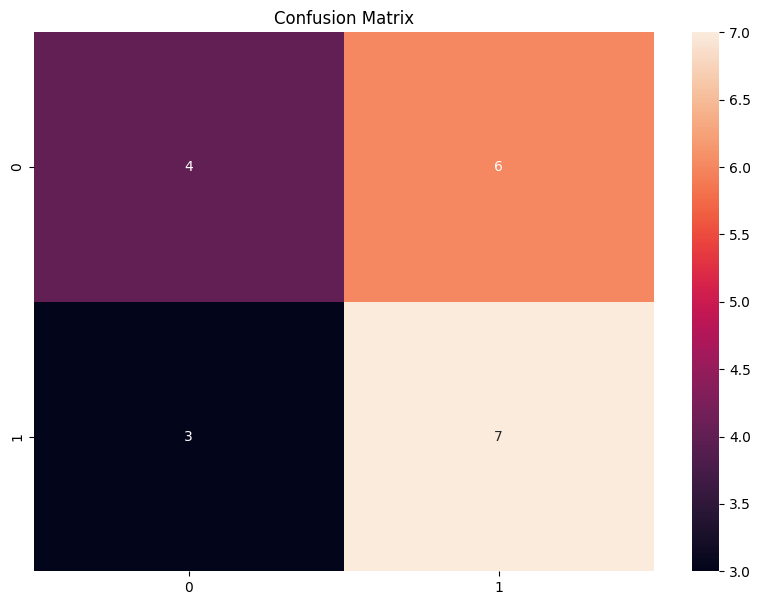

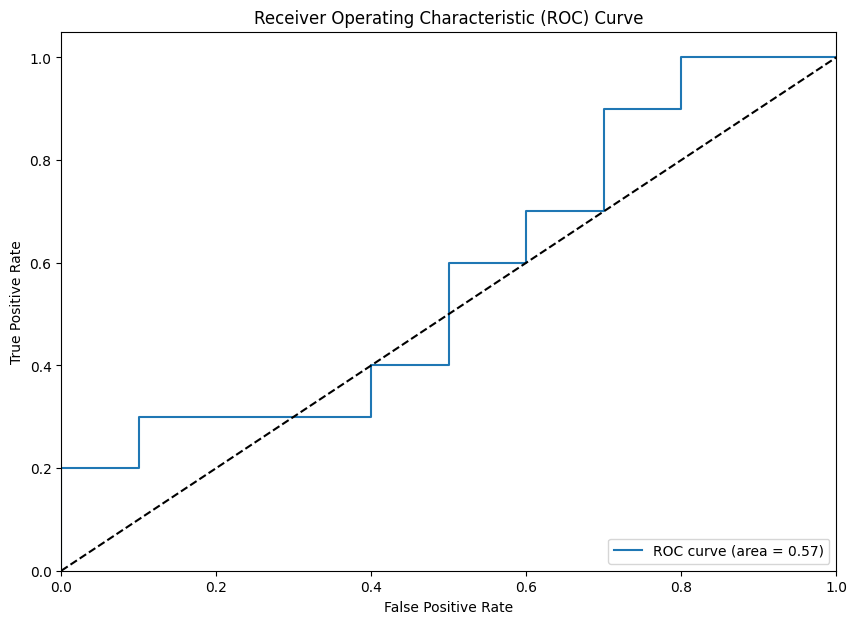

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random values for each column
num_samples = 100  # You can change this to the desired number of samples
random_data = {
    'Fluor': np.random.choice(['Fluor_A', 'Fluor_B', 'Fluor_C'], num_samples),
    'Target': np.random.choice(['Target_A', 'Target_B', 'Target_C'], num_samples),
    'Content': np.random.choice(['Content_A', 'Content_B', 'Content_C'], num_samples),
    'Cq Mean': np.random.uniform(low=22, high=28, size=num_samples),
    'Cq Std. Dev': np.random.uniform(low=0.01, high=0.5, size=num_samples),
    'Microplastics Exposure': np.random.choice([0, 1], num_samples)
}

df = pd.DataFrame(random_data)

# Label encode categorical columns
label_encoder = LabelEncoder()
df['Fluor'] = label_encoder.fit_transform(df['Fluor'])
df['Target'] = label_encoder.fit_transform(df['Target'])
df['Content'] = label_encoder.fit_transform(df['Content'])

# Features and target
features = ['Fluor', 'Target', 'Content', 'Cq Mean', 'Cq Std. Dev']
target = 'Microplastics Exposure'

X = df[features]
y = df[target]

# Label encode the target variable
y = label_encoder.fit_transform(y)

# Standardize numerical features
scaler = StandardScaler()
X[['Cq Mean', 'Cq Std. Dev']] = scaler.fit_transform(X[['Cq Mean', 'Cq Std. Dev']].copy())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy on the test set: {accuracy}')

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_binary)

# Plot ROC curve
def plot_roc_curve(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_pred)

# Continue with any additional plotting or analysis as needed
